<a href="https://colab.research.google.com/github/nuvvulapraveen17/MachineLeaning-DeepLearning/blob/main/Sigmoid/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task:**<br> To predict whether the user likes the mobile phone or not.<br>
Assumption: If the average rating of mobile >= threshold, then the user likes it, otherwise not.

# Sigmoid Class

In [36]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

**Sigmoid definition:**<br>
Two variables<br>
$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1+e^-(w_1x_1 + w_2x_2 + b)}$<br>
**Genaralized case:**<br>
$S_{w, b}(x) = \frac{1}{1+e^-(w^T x + b)}$<br>

we will split our model into two parts<br>
(i) percpetron which computes $w^T x$ + b<br>
(ii) given $w^T x$ + b, computes sigmoid value <br>

Next we will have grad_w and grad_b methods.<br>

**Fit Method:**<br>
It takes inputs as our X_train, Y_train, epochs, learning_rate, display_loss and initialize.<br>

*   Initialize: True if we want to initialize our weights to random values
*   display_loss: True if we want to display the loss values while fitting the model. Loss curve dictates what vlues to choose for learning_rate and epochs.
*   epochs: no.of times we have to loop over or data set, which is a hyper parameter.
*   learning_rate: dicatates learning rate movement in gradient direction. which is a hyper parameter.<br>
   **display_loss:** True, we will initialise a dictionary to keep track of loss after every epoch, key=epoch, value=MSE value.<br>
*   In every epoch we will itearte over entire data set and update parameters using gradient descent rule.<br>
   **Predict:** Uses to predict the y values after our model is trained, which is used during test accuracy calculation.

In [37]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*y_pred*(1-y_pred)*x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*y_pred*(1-y_pred)

  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, 
          display_loss = False):
    
    if(initialise):
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    if(display_loss):
      # we initialize a loss dictionary
      loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
      # update the values
      self.w = self.w - learning_rate*dw
      self.b = self.b - learning_rate*db

      # after every epoch store the loss
      if(display_loss):
        Y_pred = self.sigmoid(self.perceptron(X))
        # we will use mean suared error metric from sklearn
        loss [i] = mean_squared_error(Y_pred, Y)
    if(display_loss):
      plt.style.use('ggplot')
      plt.grid(True)
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    # returning numpy version of y pred
    return np.array(Y_pred)

*   we are using Data set from 91mobiles

In [38]:
!ls

mobile_cleaned.csv  sample_data


In [39]:
data = pd.read_csv('mobile_cleaned.csv')
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [40]:
data.describe()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.0,341.000000,341.000000,341.000000,341.0,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.0,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,232.970674,344.211144,5.462317,161.343109,11.120235,1.792551,72.353343,149.946394,46.369501,3191.307918,9.592375,0.211144,0.020528,0.683284,0.085044,0.002933,0.005865,0.029326,0.035191,0.580645,0.017595,0.325513,0.002933,0.005865,0.055718,0.023460,0.0,0.014663,0.002933,0.005865,0.0,0.029326,0.011730,0.017595,0.049853,0.017595,0.008798,0.008798,0.011730,0.011730,...,0.005865,0.043988,0.011730,0.043988,0.005865,0.061584,0.002933,0.041056,0.008798,0.017595,0.011730,0.002933,0.011730,0.002933,0.129032,0.026393,0.0,0.023460,0.002933,0.002933,0.076246,0.061584,0.008798,0.011730,0.002933,0.906158,0.005865,0.005865,0.002933,0.020528,0.002933,0.055718,0.002933,0.759531,0.152493,0.085044,0.020528,0.020528,0.958944,4.072434
std,137.231746,88.161129,0.742529,22.305556,61.320855,0.451598,9.357839,9.192305,46.435453,932.533527,5.953827,0.408720,0.142006,0.465879,0.279357,0.054153,0.076471,0.168965,0.184532,0.494179,0.131668,0.469255,0.054153,0.076471,0.229714,0.151583,0.0,0.120375,0.054153,0.076471,0.0,0.168965,0.107827,0.131668,0.217962,0.131668,0.093520,0.093520,0.107827,0.107827,...,0.076471,0.205370,0.107827,0.205370,0.076471,0.240751,0.054153,0.198711,0.093520,0.131668,0.107827,0.054153,0.107827,0.054153,0.335728,0.160536,0.0,0.151583,0.054153,0.054153,0.265782,0.240751,0.093520,0.107827,0.054153,0.292037,0.076471,0.076471,0.054153,0.142006,0.054153,0.229714,0.054153,0.427996,0.360026,0.279357,0.142006,0.142006,0.198711,0.377066
min,0.000000,143.000000,2.400000,58.000000,1.000000,1.000000,23.600000,115.600000,0.000000,1020.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000

In [41]:
data.shape

(341, 88)

In [42]:
# we want to predict the rating
# drop rating(label) and get X
X = data.drop('Rating', axis = 1)
Y = data['Rating']

In [43]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [44]:
# for later processing lets convert them into values
# i.e to numpy array
Y = data['Rating'].values

In [45]:
print(Y)

[4.5 4.5 4.4 4.3 4.4 4.5 4.3 4.1 4.3 4.5 4.5 4.  4.4 4.4 4.4 4.4 4.5 4.4
 4.4 4.4 4.4 4.5 4.4 4.3 4.2 4.3 4.3 4.6 4.4 4.5 3.9 4.2 4.3 4.2 4.3 4.3
 4.2 4.4 4.1 3.8 4.4 4.6 4.3 4.5 4.5 4.2 3.9 4.3 4.  4.3 4.3 3.9 4.2 4.5
 4.  4.6 4.2 2.8 4.4 4.3 4.2 4.4 4.4 4.  4.4 4.4 4.1 4.5 4.3 3.9 4.3 4.1
 4.1 4.2 3.4 4.2 4.6 3.8 4.3 4.5 4.2 4.5 4.5 4.  4.1 4.4 4.5 4.1 4.5 4.3
 4.5 3.9 3.9 4.4 4.4 4.4 4.  4.1 4.1 4.4 4.3 4.3 4.2 4.3 3.4 4.3 4.3 4.2
 4.6 4.8 4.4 3.4 3.7 4.2 4.3 4.4 4.3 4.2 4.1 4.3 4.  3.9 4.4 4.4 3.9 3.1
 3.7 4.2 4.4 4.  4.  4.1 4.2 4.3 4.2 4.3 4.1 3.6 4.1 4.  3.8 3.7 4.3 4.1
 4.1 4.5 4.  4.3 3.6 4.1 4.5 3.5 4.  4.3 4.6 3.5 3.9 4.1 3.9 3.8 4.4 4.3
 4.  3.9 4.4 4.7 3.9 4.5 3.7 4.  4.3 4.1 4.8 4.1 4.  4.7 4.  4.1 4.  3.4
 4.1 3.9 3.1 4.1 3.7 3.4 3.9 4.3 4.1 3.7 3.8 4.  3.8 4.6 3.4 3.3 3.2 3.5
 4.3 4.1 4.  3.8 4.3 4.1 4.  3.8 3.8 3.9 4.1 3.7 4.2 4.  4.2 4.4 4.1 3.4
 4.2 4.4 3.9 3.9 4.4 4.2 4.5 4.5 4.2 4.  4.2 3.5 3.7 4.3 5.  3.5 4.4 3.7
 4.3 3.9 4.3 3.8 3.8 4.3 5.  4.1 3.  4.4 3.  4.  4.

**Note:**<br>
As we can see our Y values are real but when we want to calculate the accuracy we want binarised values because our problem is binary classification sigmoid predicts real values between 0 to 1.<br>
so we have two y's one with real values and one with binarised values.<br>
lets binarise with threshold = 4 we will use same data frame and create a new column in data frame with binarised values based on threshhold and then extract it.

In [46]:
# threshold value can choosen based on experience, we can change and play around with it.
threshold = 4
data['Class'] = (data['Rating'] >= threshold)

In [47]:
# lets check it
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating,Class
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5,True
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5,True
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4,True
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3,True
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4,True


In [48]:
# this gives us true false lets convert to int
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [49]:
data['Class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    1
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [50]:
# lets check weather the data set is skewed or not
data['Class'].value_counts()

1    238
0    103
Name: Class, dtype: int64

In [51]:
# to get the counts in percentage format
data['Class'].value_counts(normalize = True)

1    0.697947
0    0.302053
Name: Class, dtype: float64

**observation:** its a highly skewed binarization, with ~ 70 and 30 % <br>
lets use different threshold for binarization -> as threshold is a parameter we can adjust it

In [52]:
threshold = 4.1
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [53]:
data['Class'].value_counts(normalize = True)

1    0.58651
0    0.41349
Name: Class, dtype: float64

In [54]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [55]:
data['Class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [56]:
threshold = 4.3
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [57]:
data['Class'].value_counts(normalize = True)

0    0.630499
1    0.369501
Name: Class, dtype: float64

**we can use threshold as 4.2**

In [58]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [59]:
data['Class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [60]:
# ground Truth values for Y
Y_binarised = data['Class'].values

**Note on stratify:**<br> 
stratify will divide our data based on the classes in our case y_train and y_test are real valued points so we have to stratify based on categorical labels Y_binarised(classes).<br>
which ensures that no.of ones and zeros in x_train and x_test is almost same. same distribution in both test and train sets

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, stratify = Y_binarised)

In [62]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(255, 87) (86, 87)
(255,) (86,)


**Standardization:**<br>
as data is of different ranges(i.e. each feature will have diff ranges) so its good to standardise all features to one range we try to ensure all features as zero mean and one standardisation it use z = (x-u)/s.<br>
we use sklearn library.

In [87]:
# instantating the standardization class
scalar = StandardScaler()

In [89]:
# now fit scalar to X_train and fit to both X_train and X_test
# we can do fit and transform in one go rather than separately
X_scaled_train = scalar.fit_transform(X_train)
# we only need to transform test set no need to fit
X_scaled_test = scalar.transform(X_test)

**y's to be standardised** 
we don't need to use standard normal for y, just transform them between 0 to 1 values bcoz of sigmoid.<br>
we use z-transform. z = (y-y_min)/(y_max - y_min)<br>
use MinMax  in sklearn

In [90]:
minmax_scalar = MinMaxScaler()

In [91]:
Y_scaled_train = minmax_scalar.fit_transform(Y_train.reshape(-1, 1))

In [92]:
print(np.max(Y_scaled_train), np.min(Y_scaled_train))

1.0 0.0


In [93]:
Y_scaled_test = minmax_scalar.transform(Y_test.reshape(-1,1))

In [94]:
# lets get binarised for test and train data set
# we need threshold for binarisation
scaled_threshold = minmax_scalar.transform(np.array([threshold]).reshape(1,-1))

In [95]:
scaled_threshold

array([[0.68]])

In [96]:
# lets get that in number instead of array
# we convert it to python list and get the element in the list by indexing
scaled_threshold = list(minmax_scalar.transform(np.array([threshold]).reshape(1,-1)))[0][0]

In [97]:
scaled_threshold

0.6800000000000002

In [98]:
# ground truth binarised values for train set
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype('int')

In [99]:
Y_binarised_train

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
    

In [100]:
# lets flatten this
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype('int').ravel()

In [101]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [102]:
# ground truth binarised values for test set
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype('int').ravel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


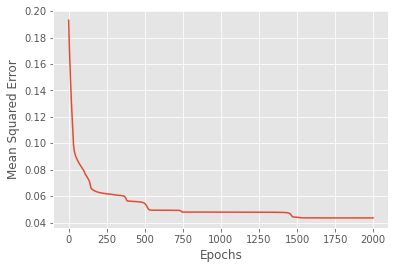

In [103]:
# instanstiating the class and fiting the model to data
sn = SigmoidNeuron()
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.01, display_loss = True)


In [105]:
# accuracy calculation
def accuracy_score_cal(y_pred, y_ground):
  accurate_rows = 0
  for y_predi, y_groundt in zip(y_pred, y_ground):
    accurate_rows += (y_predi == y_groundt)
  accuracy_value = accurate_rows/y_pred.shape[0]
  return accuracy_value

In [106]:
# Accuracy calculation on train set
Y_pred_train = sn.predict(X_scaled_train)

# convert the predicted values into binarised way for accuracy calculation.
# we are using scaled values -> so we use scaled threshold
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype('int').ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_train_cal = accuracy_score_cal(Y_pred_binarised_train, Y_binarised_train)

# print accuracy
print("Train accuracy: ", accuracy_train)
print("Train accuracy manual: ", accuracy_train_cal)

Train accuracy:  0.792156862745098
Train accuracy manual:  0.792156862745098


In [107]:
# accuracy calculation for test set
Y_pred_test = sn.predict(X_scaled_test)

Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype('int').ravel()

accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test)
accuracy_test_cal = accuracy_score_cal(Y_pred_binarised_test, Y_binarised_test)

# print accuracy
print("Train accuracy: ", accuracy_test)
print("Train accuracy manual: ", accuracy_test_cal)

Train accuracy:  0.7906976744186046
Train accuracy manual:  0.7906976744186046
